# EDA on Text Data

# Women's E-Commerce Clothing Reviews 

Dataset: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

Age: Positive Integer variable of the reviewers age.

Title: String variable for the title of the review.

Review Text: String variable for the review body.

Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not 
recommended.

Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

Division Name: Categorical name of the product high level division.

Department Name: Categorical name of the product department name.

Class Name: Categorical name of the product class name.

In [2]:
# !pip install plotly
# !pip install cufflinks
# !pip install textblob

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import plotly as py
import cufflinks as cf

In [5]:
from plotly.offline import iplot

In [6]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

## Data Import 

In [7]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [8]:
df.drop(labels=['Title', 'Clothing ID'], axis = 1, inplace=True)

In [9]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

In [10]:
df.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [11]:
df.dropna(subset=['Review Text', 'Division Name'], inplace = True)

In [12]:
df.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

## Text Cleaning 

In [17]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [18]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\', '')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [19]:
x = "i don't know what date is today, I am 5'8\"" 

In [21]:
print(cont_to_exp(x))

i do not know what date is today, I am 5'8"


In [23]:
%%time
df['Review Text'] = df['Review Text'].apply(lambda x: cont_to_exp(x))

Wall time: 1.53 s


In [24]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

In [27]:
print(' '.join(df['Review Text'].tolist())[:1000])

Absolutely wonderful - silky and sexy and comfortable Love this dress!  it is sooo pretty.  i happened to find it in a store, and i am glad i did bc i never would have ordered it online bc it is petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite. I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love, love, love this jumpsuit. it is fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! This shirt i

## Feature Engineering 

In [29]:
from textblob import TextBlob

In [28]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

In [30]:
df['polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [31]:
df['review_len'] = df['Review Text'].apply(lambda x: len(x))

In [32]:
df['word_count'] = df['Review Text'].apply(lambda x: len(x.split()))

In [33]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        
    return word_len/len(words)

In [34]:
df['avg_word_len'] = df['Review Text'].apply(lambda x: get_avg_word_len(x))

In [35]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  polarity  review_len  word_count  avg_word_len  
0  Intimates  0.633333          53           8      5.750000  
1    Dresses  0.339583         306          65      3.646154  
2    Dresses  0.073675         500          98      4.112245  
3      Pants  0.550000         125          23      4.478261  
4    Blouses  0.512891         192          36      4.361111

## Distribution of Sentiment Polarity 

In [36]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  polarity  review_len  word_count  avg_word_len  
0  Intimates  0.633333          53           8      5.750000  
1    Dresses  0.339583         306          65      3.646154  
2    Dresses  0.073675         500          98      4.112245  
3      Pants  0.550000         125          23      4.478261  
4    Blouses  0.512891         192          36      4.361111

In [42]:
df['polarity'].iplot(kind = 'hist', colors = 'red', bins = 50,
                    xTitle = 'Polarity', yTitle = 'Count', title  = 'Sentiment Polarity Distribution')

## Distribution of Reviews Rating and Reviewers Age

In [44]:
df['Rating'].iplot(kind = 'hist', xTitle = 'Rating', yTitle = 'Count',
                  title = 'Review Rating Distribution')

In [55]:
df['Age'].iplot(kind = 'hist', bins = 40, xTitle = 'Age', yTitle = 'Count',
               title = 'Reviewers Age Dist', colors = 'orange', linecolor = 'gray')

## Distribution of Review Text Length and Word Length

In [59]:
df['review_len'].iplot(kind = 'hist', xTitle = 'Review Len', yTitle = 'Count', title = 'Review Text Len Dist')

In [60]:
df['word_count'].iplot(kind = 'hist', xTitle = 'Word Count', yTitle = 'Count', title = 'Word Count Distribution')

In [61]:
df['avg_word_len'].iplot(kind = 'hist', xTitle = 'Avg Word Len', yTitle = 'Count', title = 'Review Text Avg Word Len Dist')

In [ ]:
df['word_count'].iplot(kind = 'hist', xTitle = 'Word Count', yTitle = 'Count', 
                       title = 'Word Count Distribution')

## Distribution of Department, Division, and Class 

In [64]:
df.head(1)

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   

   Recommended IND  Positive Feedback Count Division Name Department Name  \
0                1                        0     Initmates        Intimate   

  Class Name  polarity  review_len  word_count  avg_word_len  
0  Intimates  0.633333          53           8          5.75

In [65]:
df['Department Name'].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [66]:
df.groupby('Department Name').count()

Age  Review Text  Rating  Recommended IND  \
Department Name                                                
Bottoms           3662         3662    3662             3662   
Dresses           6145         6145    6145             6145   
Intimate          1653         1653    1653             1653   
Jackets           1002         1002    1002             1002   
Tops             10048        10048   10048            10048   
Trend              118          118     118              118   

                 Positive Feedback Count  Division Name  Class Name  polarity  \
Department Name                                                                 
Bottoms                             3662           3662        3662      3662   
Dresses                             6145           6145        6145      6145   
Intimate                            1653           1653        1653      1653   
Jackets                             1002           1002        1002      1002   
Tops                               10048          10048       10048     10048   
Trend                                118            118         118       118   

                 review_len  word_count  avg_word_len  
Department Name                                        
Bottoms                3662        3662          3662  
Dresses                6145        6145          6145  
Intimate               1653        1653          1653  
Jackets                1002        1002          1002  
Tops                  10048       10048         10048  
Trend                   118         118           118

In [75]:
df['Department Name'].value_counts().iplot(kind = 'bar', yTitle = 'Count', xTitle = 'Department',
                                          title = "Bar Chart of Department's Name")

In [77]:
df['Division Name'].value_counts().iplot(kind = 'bar', yTitle = 'Count', xTitle = 'Division',
                                          title = "Bar Chart of Division's Name")


In [78]:
df['Class Name'].value_counts().iplot(kind = 'bar', yTitle = 'Count', xTitle = 'Class',
                                          title = "Bar Chart of Class's Name")


## Distribution of Unigram, Bigram and Trigram 

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
x = 'this is a test example'

# unigram = this, is, a, test, example
# bigram = this is, is a, a test, test example
# trigram = this is a, is a test, a test example

### Unigram 

In [115]:
x = ['this is the list list this this this']

In [121]:
vec = CountVectorizer().fit(x)
bow = vec.transform(x)
sum_words = bow.sum(axis = 0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
words_freq[:2]

[('this', 4), ('list', 2)]

In [124]:
def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [126]:
get_top_n_words(x, 3)

[('this', 4), ('list', 2), ('is', 1)]

In [128]:
words = get_top_n_words(df['Review Text'], 20)

In [129]:
words

[('the', 76159),
 ('it', 49273),
 ('and', 49008),
 ('is', 38103),
 ('this', 25758),
 ('to', 24577),
 ('in', 20722),
 ('but', 16549),
 ('not', 16376),
 ('on', 15325),
 ('for', 13994),
 ('of', 13428),
 ('was', 12923),
 ('with', 12797),
 ('so', 12017),
 ('am', 11174),
 ('my', 11027),
 ('dress', 10567),
 ('that', 10011),
 ('have', 9077)]

In [140]:
df1 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df1 = df1.set_index('Unigram')
df1.iplot(kind = 'bar', xTitle = 'Unigram', yTitle = 'Count', title = ' Top 20 unigram words')

### Bigram 

In [141]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [142]:
get_top_n_words(x, 3)

[('this this', 2), ('this is', 1), ('is the', 1)]

In [143]:
words = get_top_n_words(df['Review Text'], 20)

In [144]:
words

[('it is', 12525),
 ('in the', 7169),
 ('and the', 5613),
 ('this dress', 4758),
 ('on the', 4337),
 ('of the', 3933),
 ('and it', 3723),
 ('it was', 3287),
 ('this top', 2939),
 ('this is', 2772),
 ('is very', 2729),
 ('the fabric', 2655),
 ('love the', 2641),
 ('did not', 2486),
 ('love this', 2331),
 ('to wear', 2266),
 ('but it', 2196),
 ('the dress', 2180),
 ('is not', 2130),
 ('do not', 2117)]

In [145]:
df1 = pd.DataFrame(words, columns = ['Bigram', 'Frequency'])
df1 = df1.set_index('Bigram')
df1.iplot(kind = 'bar', xTitle = 'Bigram', yTitle = 'Count', title = ' Top 20 Bigram words')

### Trigram 

In [146]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [147]:
get_top_n_words(x, 3)

[('this is the', 1), ('is the list', 1), ('the list list', 1)]

In [148]:
words = get_top_n_words(df['Review Text'], 20)

In [149]:
words

[('true to size', 1316),
 ('the fabric is', 1301),
 ('and it is', 1124),
 ('this dress is', 1123),
 ('it is very', 976),
 ('but it is', 921),
 ('it is not', 910),
 ('the material is', 896),
 ('in the store', 728),
 ('on the model', 725),
 ('the fit is', 696),
 ('this top is', 672),
 ('the color is', 630),
 ('love this dress', 605),
 ('it is so', 584),
 ('tried it on', 574),
 ('and it was', 550),
 ('in the back', 528),
 ('the dress is', 518),
 ('up or down', 518)]

In [150]:
df1 = pd.DataFrame(words, columns = ['Trigram', 'Frequency'])
df1 = df1.set_index('Trigram')
df1.iplot(kind = 'bar', xTitle = 'Trigram', yTitle = 'Count', title = ' Top 20 Trigram words')

## Distribution of Unigram, Bigram and Trigram without STOP WORDS

### Unigram 

In [156]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(1, 1), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [157]:
get_top_n_words(x, 3)

[('list', 2)]

In [158]:
words = get_top_n_words(df['Review Text'], 20)

In [159]:
words

[('dress', 10567),
 ('love', 8945),
 ('size', 8770),
 ('fit', 7322),
 ('like', 7148),
 ('wear', 6434),
 ('great', 6114),
 ('just', 5604),
 ('fabric', 4797),
 ('small', 4726),
 ('color', 4604),
 ('look', 4039),
 ('really', 3924),
 ('ordered', 3850),
 ('little', 3773),
 ('perfect', 3772),
 ('flattering', 3519),
 ('did', 3447),
 ('soft', 3336),
 ('comfortable', 3058)]

In [160]:
df1 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df1 = df1.set_index('Unigram')
df1.iplot(kind = 'bar', xTitle = 'Unigram', yTitle = 'Count', title = ' Top 20 Unigram words')

### Bigram 

In [161]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [162]:
get_top_n_words(x, 3)

[('list list', 1)]

In [163]:
words = get_top_n_words(df['Review Text'], 20)

In [164]:
words

[('true size', 1347),
 ('love dress', 766),
 ('usually wear', 694),
 ('looks great', 620),
 ('fit perfectly', 609),
 ('size small', 540),
 ('fits perfectly', 489),
 ('usual size', 479),
 ('just right', 434),
 ('look like', 426),
 ('ordered size', 375),
 ('love love', 374),
 ('looks like', 373),
 ('runs large', 367),
 ('super cute', 363),
 ('highly recommend', 363),
 ('wear size', 361),
 ('fabric soft', 356),
 ('feel like', 349),
 ('fit great', 348)]

In [165]:
df1 = pd.DataFrame(words, columns = ['Bigram', 'Frequency'])
df1 = df1.set_index('Bigram')
df1.iplot(kind = 'bar', xTitle = 'Bigram', yTitle = 'Count', title = ' Top 20 Bigram words')

### Trigram 

In [166]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [170]:
x

['this is the list list this this this']

In [169]:
# get_top_n_words(x, 3)

In [171]:
words = get_top_n_words(df['Review Text'], 20)

In [172]:
words

[('fits true size', 280),
 ('fit true size', 229),
 ('runs true size', 148),
 ('love love love', 143),
 ('usually wear size', 136),
 ('ordered usual size', 107),
 ('does run large', 96),
 ('really wanted love', 94),
 ('wanted love dress', 88),
 ('usually wear small', 80),
 ('small fit perfectly', 77),
 ('just did work', 71),
 ('looks great jeans', 70),
 ('fit like glove', 69),
 ('usually wear medium', 68),
 ('normally wear size', 68),
 ('small fits perfectly', 65),
 ('size fit perfectly', 65),
 ('fits like glove', 65),
 ('usual size small', 64)]

In [173]:
df1 = pd.DataFrame(words, columns = ['Trigram', 'Frequency'])
df1 = df1.set_index('Trigram')
df1.iplot(kind = 'bar', xTitle = 'Trigram', yTitle = 'Count', title = ' Top 20 Trigram words')

## Distribution of Top 20 Parts-of-Speech POS tags 

In [174]:
!pip install nltk

In [175]:
import nltk

In [176]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Laxmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Laxmi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [180]:
print(str(df['Review Text']))

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it is sooo pretty.  i happen...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it is fun, f...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22628, dtype: object


In [177]:
blob = TextBlob(str(df['Review Text']))

In [183]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Laxmi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.


True

In [185]:
print(nltk.help.upenn_tagset())

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [188]:
pos_df = pd.DataFrame(blob.tags, columns = ['words', 'pos'])
pos_df = pos_df['pos'].value_counts()
pos_df

NN     23
DT     15
JJ     13
CD     11
PRP     8
RB      6
IN      5
VBZ     5
VBP     5
NNP     4
VBD     4
CC      4
TO      3
NNS     2
VB      2
PDT     1
Name: pos, dtype: int64

In [189]:
pos_df.iplot(kind = 'bar')

----

## Bivariate Analysis 

In [190]:
df.head(2)

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   

   Recommended IND  Positive Feedback Count Division Name Department Name  \
0                1                        0     Initmates        Intimate   
1                1                        4       General         Dresses   

  Class Name  polarity  review_len  word_count  avg_word_len  
0  Intimates  0.633333          53           8      5.750000  
1    Dresses  0.339583         306          65      3.646154

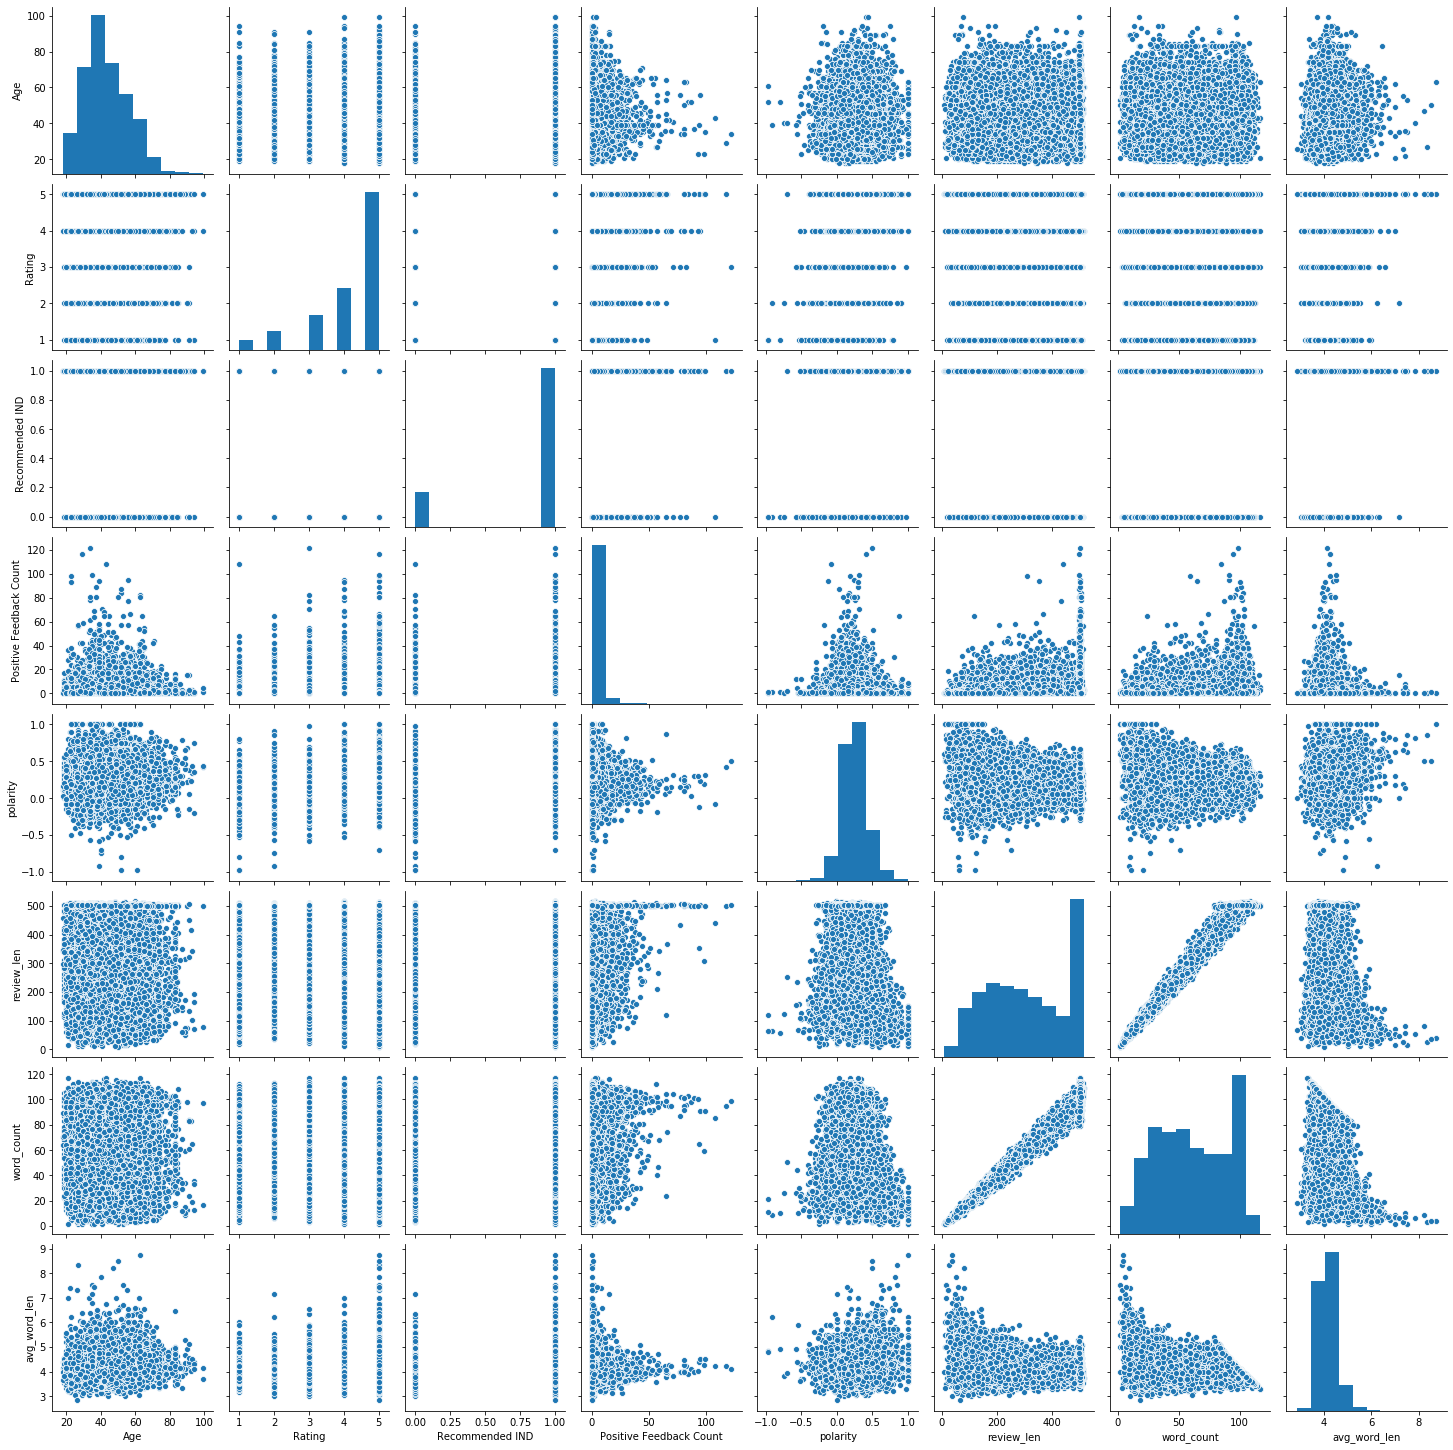

In [191]:
sns.pairplot(df)

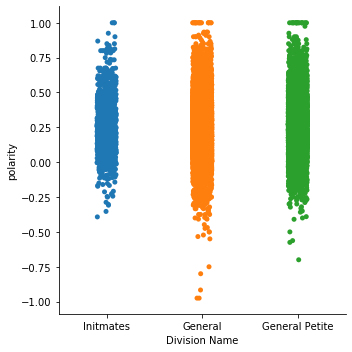

In [192]:
sns.catplot(x = 'Division Name', y = 'polarity', data = df)

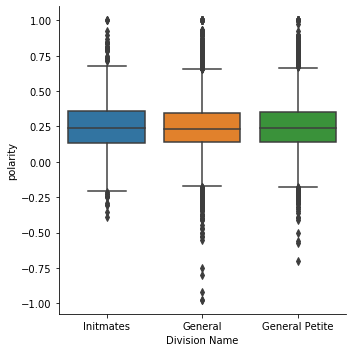

In [193]:
sns.catplot(x = 'Division Name', y = 'polarity', data = df, kind = 'box')

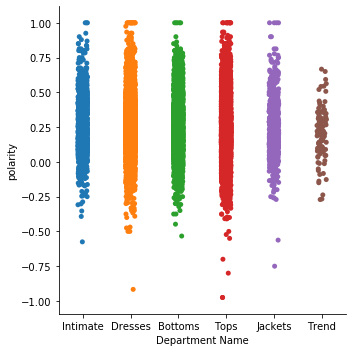

In [194]:
sns.catplot(x = 'Department Name', y = 'polarity', data = df)

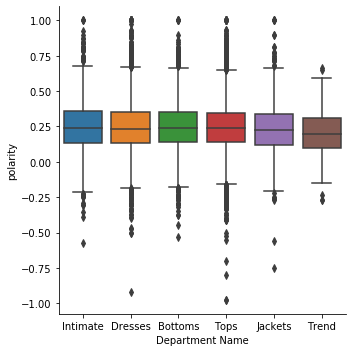

In [196]:
sns.catplot(x = 'Department Name', y = 'polarity', data = df, kind = 'box')

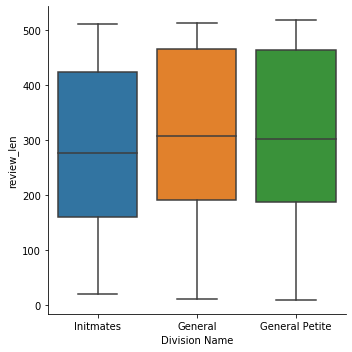

In [197]:
sns.catplot(x = 'Division Name', y = 'review_len', data = df, kind = 'box')

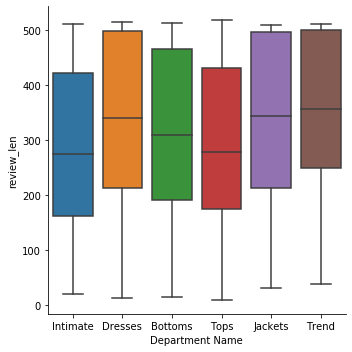

In [198]:
sns.catplot(x = 'Department Name', y = 'review_len', data = df, kind = 'box')

## Distribution of Sentiment Polarity of Reviews Based on the Recommendation 

In [199]:
import plotly.express as px
import plotly.graph_objects as go

In [229]:
x1 = df[df['Recommended IND']==1]['polarity']
x0 = df[df['Recommended IND']==0]['polarity']

In [230]:
type(x1)

pandas.core.series.Series

In [233]:
trace0 = go.Histogram(x = x0, name = 'Not Recommended', opacity = 0.7)
trace1 = go.Histogram(x = x1, name = 'Recommended', opacity = 0.7)

In [234]:
data = [trace0, trace1]
layout = go.Layout(barmode = 'overlay', title = 'Distribution of Sentiment Polarity of Reviews Based on the Recommendation')
fig = go.Figure(data = data, layout = layout)

iplot(fig)

## Distribution of Ratings Based on the Recommendation 

In [235]:
x1 = df[df['Recommended IND']==1]['Rating']
x0 = df[df['Recommended IND']==0]['Rating']

In [236]:
type(x1)

pandas.core.series.Series

In [237]:
trace0 = go.Histogram(x = x0, name = 'Not Recommended', opacity = 0.7)
trace1 = go.Histogram(x = x1, name = 'Recommended', opacity = 0.7)

In [238]:
data = [trace0, trace1]
layout = go.Layout(barmode = 'overlay', title = 'Distribution of Reviews Rating Based on the Recommendation')
fig = go.Figure(data = data, layout = layout)

iplot(fig)

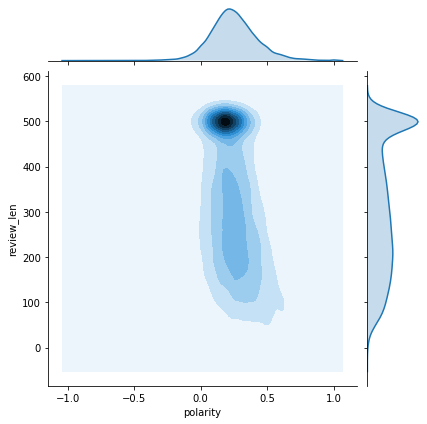

In [241]:
sns.jointplot(x = 'polarity', y = 'review_len', data = df, kind = 'kde')

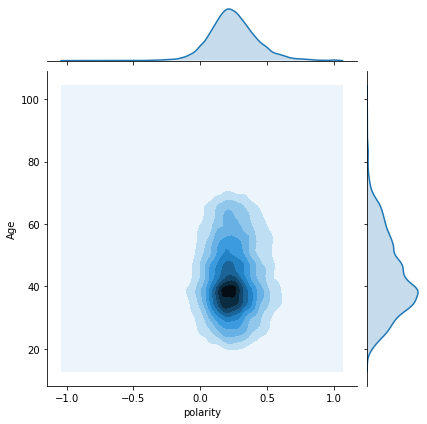

In [242]:
sns.jointplot(x = 'polarity', y = 'Age', data = df, kind = 'kde')